### Introduction to Ordinary Least Squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### THE MODEL

$$ y = \beta_0 + \beta_1 x + \epsilon$$

In [2]:
x = np.linspace(0, 1, 10)
y = 3 + 4*x + np.random.rand(10)

In [8]:
def y1(x): return 4 + 2*x
def y2(x): return 4.1 + 2.8*x

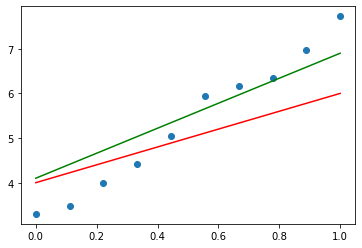

In [9]:
plt.scatter(x, y)
plt.plot(x, y1(x), color = 'red')
plt.plot(x, y2(x), color = 'green')

### Regression Examples

- Fit a model with `statsmodels`
- Fit a model with `sklearn`

In [10]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
cali = fetch_california_housing(as_frame = True)

In [17]:
data = cali['frame']

In [18]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
X = data['MedInc']
y = data['MedHouseVal']

In [22]:
X = sm.add_constant(X)

In [23]:
#fit with statsmodels
model = sm.OLS(y, X).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:54:20   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X = data[['MedInc']]

In [35]:
#with sklearn

#instantiate
lr = LinearRegression()

In [36]:
#fit
lr.fit(X, y)

LinearRegression()

In [37]:
lr.coef_

array([0.41793849])

In [38]:
lr.intercept_

0.4508557670326794

In [39]:
lr.predict(X)

array([3.9302773 , 3.92033036, 3.48400258, ..., 1.1613512 , 1.23123052,
       1.44914365])

### Evaluate!

In [40]:
preds = lr.predict(X)

In [41]:
mean_absolute_error(y, preds)

0.626259337911434

In [42]:
mean_squared_error(y, preds)

0.7011311502929527

### Multiple Features

In [43]:
X = data.drop('MedHouseVal', axis = 1)

In [44]:
lr_2 = LinearRegression()

In [45]:
lr_2.fit(X, y)

LinearRegression()

In [46]:
preds = lr_2.predict(X)

In [47]:
mean_absolute_error(y, preds)

0.5311643817546459

In [48]:
mean_squared_error(y, preds)

0.5243209861846072